## Graph Creation and Drawing with Networkx
In general you can create:
- Graph (undirected, no multi edges)
- MultiGraph (undirected, multiple edges allowed betwenn a pair of nodes)
and their directed versions, i.e. DiGraph and MultiDiGraph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### Create and visualize a weighted DiGraph

[(1, 5, {'weight': 5}), (1, 2, {'weight': 8}), (2, 1, {'weight': 2}), (2, 6, {'weight': 5}), (2, 3, {'weight': 2}), (2, 4, {'weight': 2}), (3, 4, {'weight': 3}), (4, 3, {'weight': 7})]

n = 6  m = 8 

<class 'networkx.classes.digraph.DiGraph'>


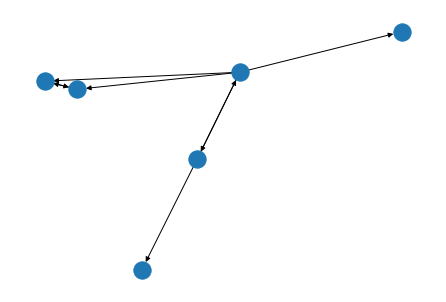

In [2]:
#Toy network, weighted and directed
G= nx.DiGraph()

#Add weighted arcs
G.add_edge(1,5, weight = 5)
G.add_edge(1,2, weight = 6)
G.add_edge(2,1, weight = 2)
G.add_edge(2,6, weight = 5)
G.add_edge(2,3, weight = 2)
G.add_edge(2,4, weight = 2)
G.add_edge(3,4, weight = 3)
G.add_edge(4,3, weight = 7)

#Change predifined edge weight
G[1][2]['weight'] = 8

#Inspect arc data and graph properties
print(G.edges(data=True))
print("\nn =", G.number_of_nodes(), " m =", G.number_of_edges(), "\n")
print(type(G))

#Draw a basic version of the graph
nx.draw(G)

You can similarly add node attributes.

In [3]:
G.nodes[1]['hair'] = "blonde"

#Visualize node attributes
G.nodes.data()

NodeDataView({1: {'hair': 'blonde'}, 5: {}, 2: {}, 6: {}, 3: {}, 4: {}})

#### Generate Random Graphs
You can use a stochastic graph generator, such as:

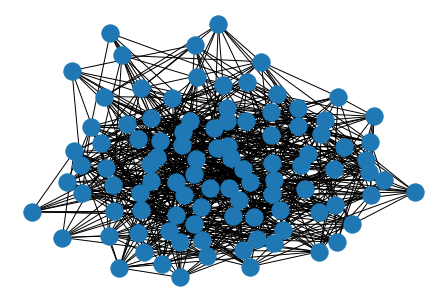

In [4]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)

nx.draw(er)

and save the graph.

In [5]:
nx.write_gml(G, "G.gml")
G = nx.read_gml("G.gml")

#### Improve Netowrk Visualization

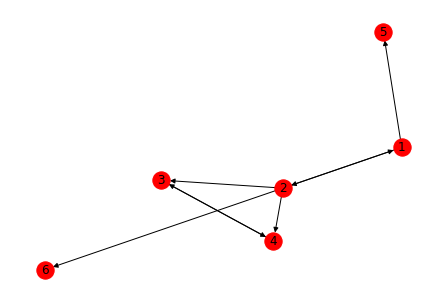

In [6]:
#Determine layout
pos = nx.spring_layout(G) 
pos = nx.kamada_kawai_layout(G) #an alternative

#Draw showing node labels and changing node colo
nx.draw(G, with_labels = True, pos = pos, node_color="#ff0000")

In [7]:
#Calculate node degree
deg = G.degree()
deg

DiDegreeView({'1': 3, '5': 1, '2': 5, '6': 1, '3': 3, '4': 3})

Here we adjust node colors and size, based on their degree. Moreover we add a colorbar and do some other adjustments.

In [8]:
#Define custom colors based on degree (here get the degree value of each node)
n_color = np.asarray([deg[n] for n in G.nodes()])
n_color

array([3, 1, 5, 1, 3, 3])

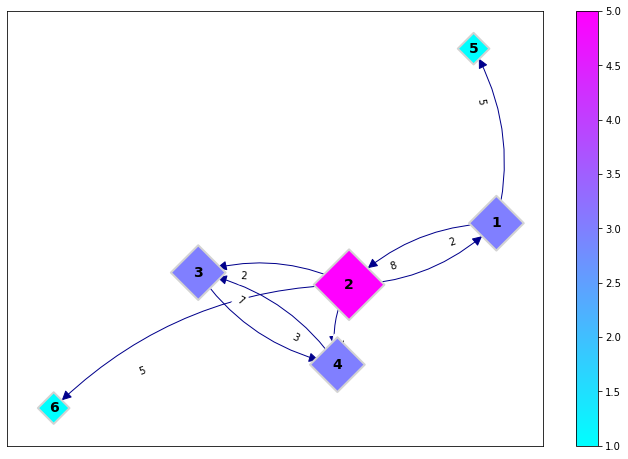

In [15]:
#Set the colormap
cmap = plt.get_cmap('cool')

#Specify figure size
plt.figure(1,figsize=(12,8)) 

#Draw
#For node shape see matplotlib.scatter markers: https://matplotlib.org/3.1.1/api/markers_api.html
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), cmap=cmap, node_color=n_color,
                 node_size = n_color*500, with_labels=True, node_shape='D',
                 font_color='black', font_size= 14, font_weight = "bold",
                 vmin = n_color.min(), vmax=n_color.max(),
                 connectionstyle='arc3, rad=0.2', #for curved edges
                 arrowsize = 20, edge_color = "darkblue", #size of arrows and color of edges
                 edgecolors = "lightgrey",linewidths = 2, #set the node outline width and color
                 alpha = 1) #sets the node and edge transparency

#Draw edge weights (works better with straight lines)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.3)

#Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = n_color.min(), vmax=n_color.max()))
sm.set_array([])
cbar = plt.colorbar(sm)